In [439]:
#Assigment 
#Fanny Rocio Tutillo
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


olimpyc_df= pd.read_csv('/Users/rociotutillo/Library/CloudStorage/OneDrive-Personal/Data_Analitycs/Data Visualization/athlete_events.csv')
#read file using seaborn
#olimpyc_df = sns.load_dataset('/Users/rociotutillo/Library/CloudStorage/OneDrive-Personal/Data_Analitycs/Data Visualization/athlete_events.csv')
olimpyc_df.head()




,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [440]:
#Clean Data and filter data of 2016
olimpyc_df = olimpyc_df.dropna()
df_2016 = olimpyc_df[olimpyc_df["Year"] == 2016] 
df_2016.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
161,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
175,73,Luc Abalo,M,31.0,182.0,86.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver
450,250,Saeid Morad Abdevali,M,26.0,170.0,80.0,Iran,IRI,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",Bronze
794,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver


In [441]:
cut_count_table = pd.crosstab(index=df_2016['Sport'],columns='Total_Medals')
#Filter the DataFrame one more time to only include the records for the top five sports in 2016. 
df_top5= cut_count_table.sort_values(by='Total_Medals', ascending=False).head(5)
print(df_top5)

col_0      Total_Medals
Sport                  
Swimming            190
Athletics           188
Rowing              144
Football            105
Hockey               99


<Axes: xlabel='Sport'>

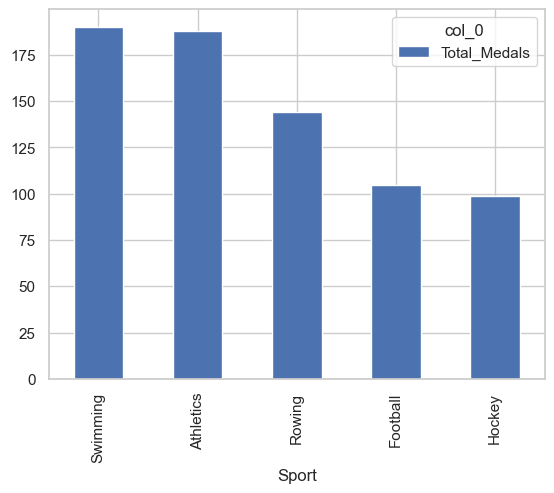

In [442]:
#Filter the DataFrame one more time to only include the records for the top five sports in 2016. 
df_top5.plot(kind='bar')


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
814,465,"Matthew ""Matt"" Abood",M,30.0,197.0,92.0,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Bronze
1228,690,Chantal Achterberg,F,31.0,172.0,72.0,Netherlands,NED,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Quadruple Sculls,Silver
1529,846,Valerie Kasanita Adams-Vili (-Price),F,31.0,193.0,120.0,New Zealand,NZL,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Shot Put,Silver
1847,1017,Nathan Ghar-Jun Adrian,M,27.0,198.0,100.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 50 metres Freestyle,Bronze


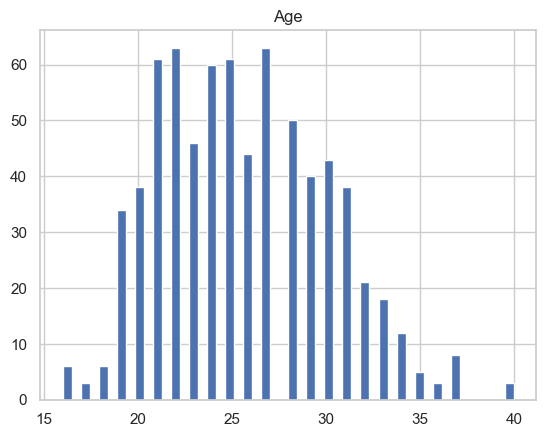

In [443]:
#Generate a histogram for the Age feature of all medal winners in the top five sports (2016).

df_histogram = df_2016[df_2016["Sport"].isin({"Swimming", "Athletics","Rowing", "Football", "Hockey"})]
df_histogram.hist(column='Age', bins=50)
df_histogram.head()



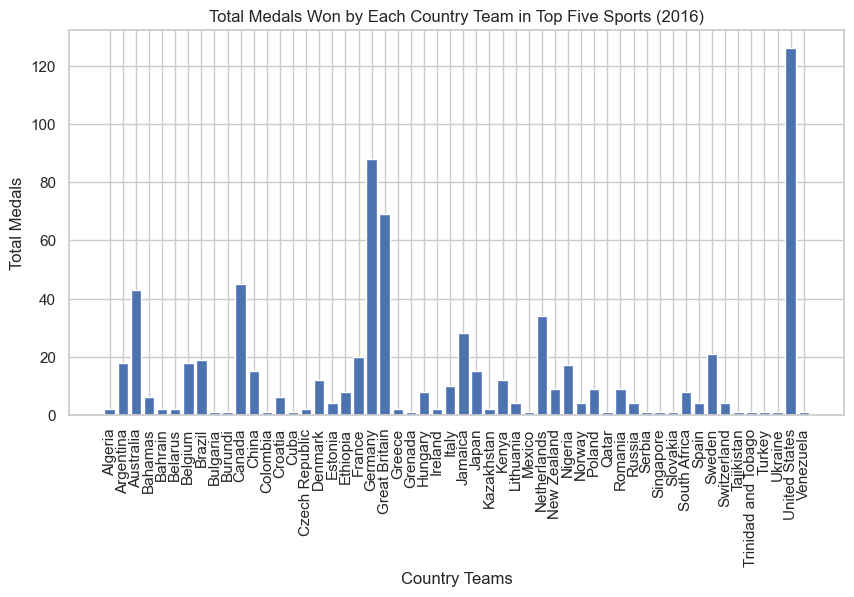

In [444]:
#Generate a bar plot indicating how many medals were won by each country's team in the top five sports in 2016.

grouped_df = df_histogram.groupby(['Team', 'Sport']).size().reset_index(name='Total_Medals')

# Sum the medals across the top five sports for each team
total_medals_by_team = grouped_df.groupby('Team')['Total_Medals'].sum().reset_index()

# Generate the bar plot
plt.figure(figsize=(10, 5))
plt.bar(total_medals_by_team['Team'], total_medals_by_team['Total_Medals'])
plt.xlabel('Country Teams')
plt.ylabel('Total Medals')
plt.title('Total Medals Won by Each Country Team in Top Five Sports (2016)')
plt.xticks(rotation=90)
plt.show()


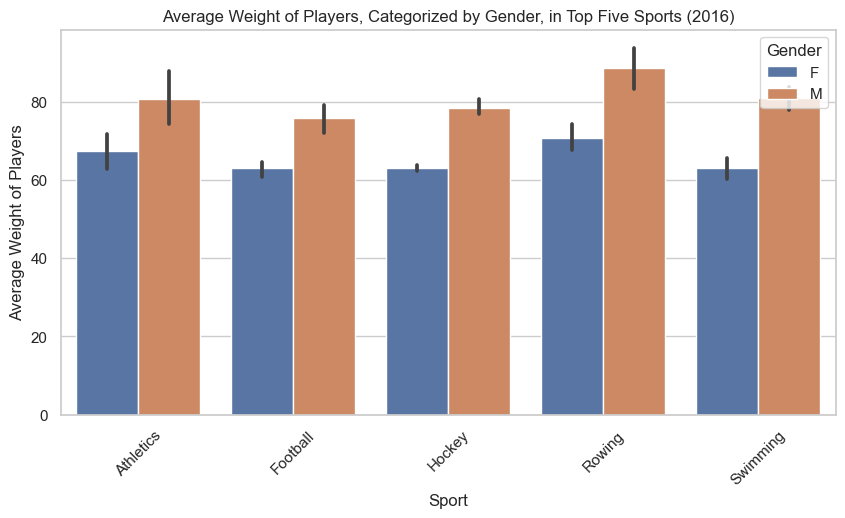

In [445]:
#Generate a bar plot indicating the average weight of players, categorized based on gender, winning in the top five sports in 2016.
grouped_df = df_histogram.groupby(['Sport', 'Sex', 'Team'])['Weight'].mean().reset_index()

# Generate the bar plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='Sport', y='Weight', hue='Sex', data=grouped_df)
plt.xlabel('Sport')
plt.ylabel('Average Weight of Players')
plt.title('Average Weight of Players, Categorized by Gender, in Top Five Sports (2016)')
plt.xticks(rotation=45)
plt.legend(title='Gender', loc='upper right')
plt.show()



